In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')
from importlib import reload

import seaborn as sns
sns.set(color_codes=True,rc={'figure.figsize':(11.7,8.27)})

In [50]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
train.shape

(42000, 785)

In [111]:
train.drop_duplicates().shape

(42000, 785)

In [52]:
train.isnull().sum().unique()

array([0], dtype=int64)

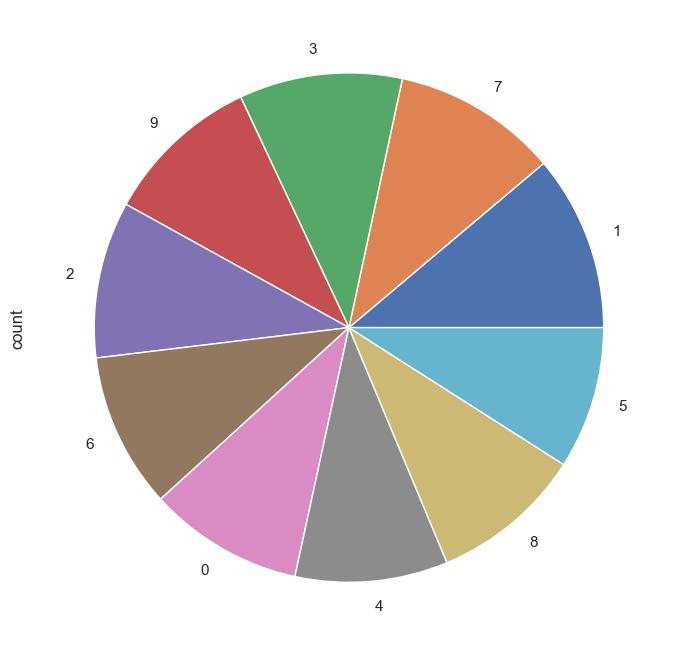

In [115]:
train['label'].value_counts().plot.pie();

Нет nan-значений, нет дубликатов, равное распределние групп

In [53]:
X = train.drop('label', axis=1)
y = train['label']

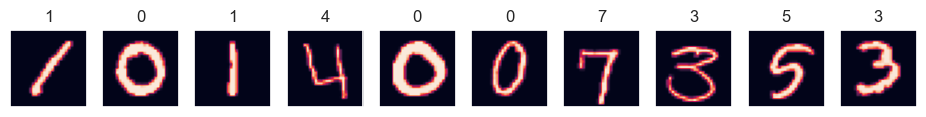

In [54]:
for i in range(10):
    ax = plt.subplot(1,10 ,i+1)
    im=ax.imshow(X.iloc[i].values.reshape(28,28))
    plt.xlabel=''
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.title(y.iloc[i])

Посмотрим на первые несколько компонент

In [55]:
from sklearn.decomposition import PCA

first_pca = PCA(10)
X_ten_comp = first_pca.fit_transform(X)

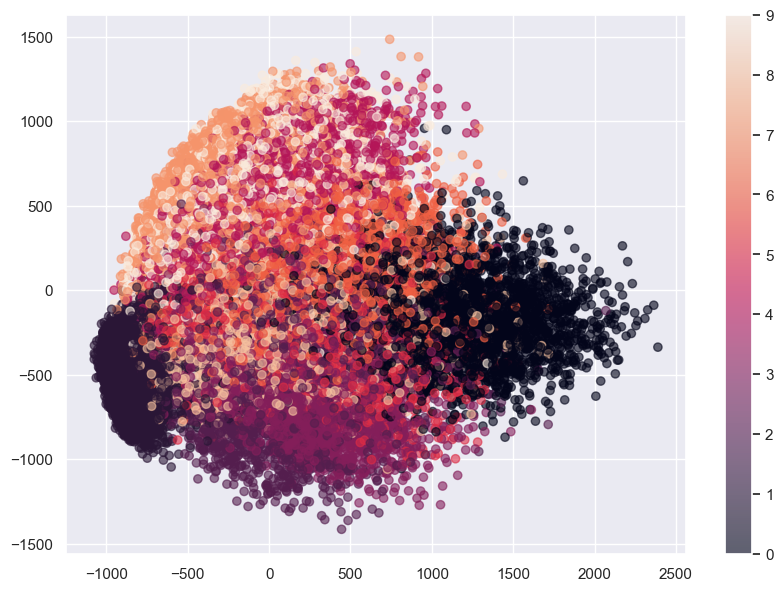

In [56]:
plt.figure(figsize=(10,7))
plt.scatter(X_ten_comp[:, 0], X_ten_comp[:, 1], c=y, alpha=0.6);
plt.colorbar();

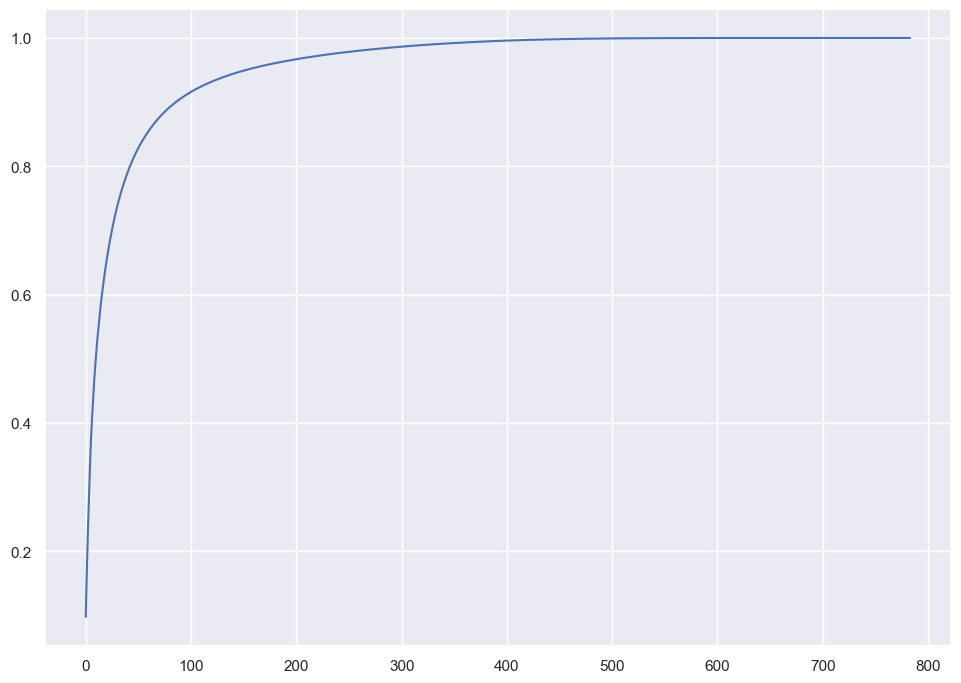

In [57]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_));

200 компонент представляют более 95% информации

In [58]:
pca = PCA(n_components=200)
X_pca = pca.fit_transform(X);
test_pca = pca.fit_transform(test)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=17)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,10)
test_accuracy = np.empty(len(neighbors)+1)
train_accuracy = np.empty(len(neighbors)+1)

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_accuracy[n] = knn.score(X_train, y_train)
    test_accuracy[n] = knn.score(X_test, y_test)

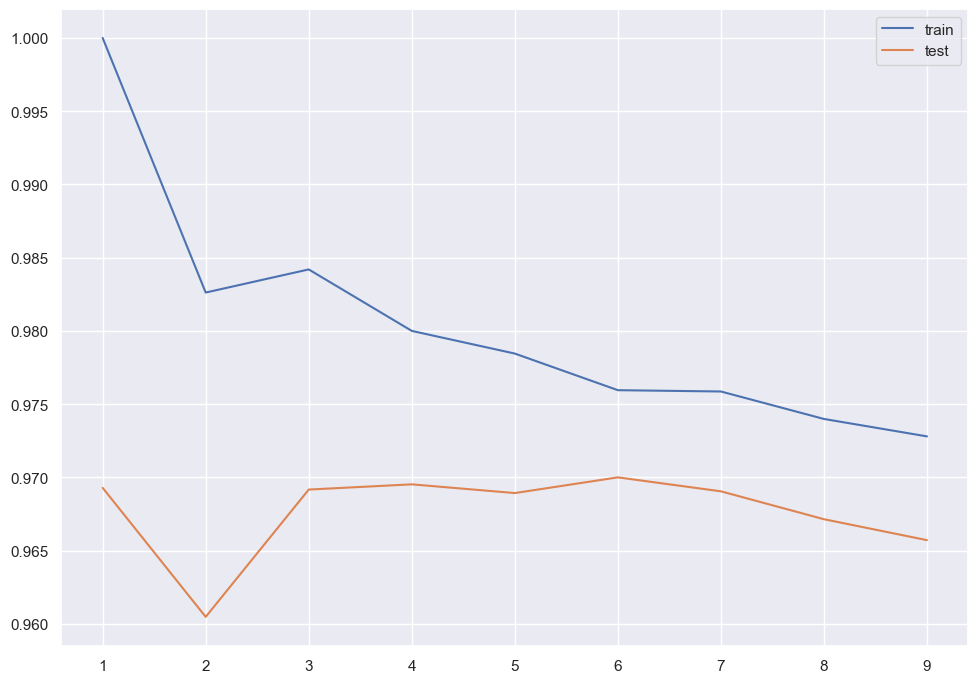

In [114]:
plt.plot(neighbors, train_accuracy[1:], label='train')
plt.plot(neighbors, test_accuracy[1:], label='test')
plt.legend()
plt.show()

При 200 компонентах лучший score у 6ти соседей

In [61]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_pca, y)

KNeighborsClassifier(n_neighbors=6)

In [62]:
pred = knn.predict(test_pca)

In [63]:
pred.shape

(28000,)

In [64]:
Submission = pd.DataFrame({
        "ImageId": range(1, pred.shape[0]+1),
        "Label": pred
    })

Submission.to_csv("KnnFirstSubmission.csv", index=False)

Submission.head(5)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,1
4,5,4


Score = 0.583

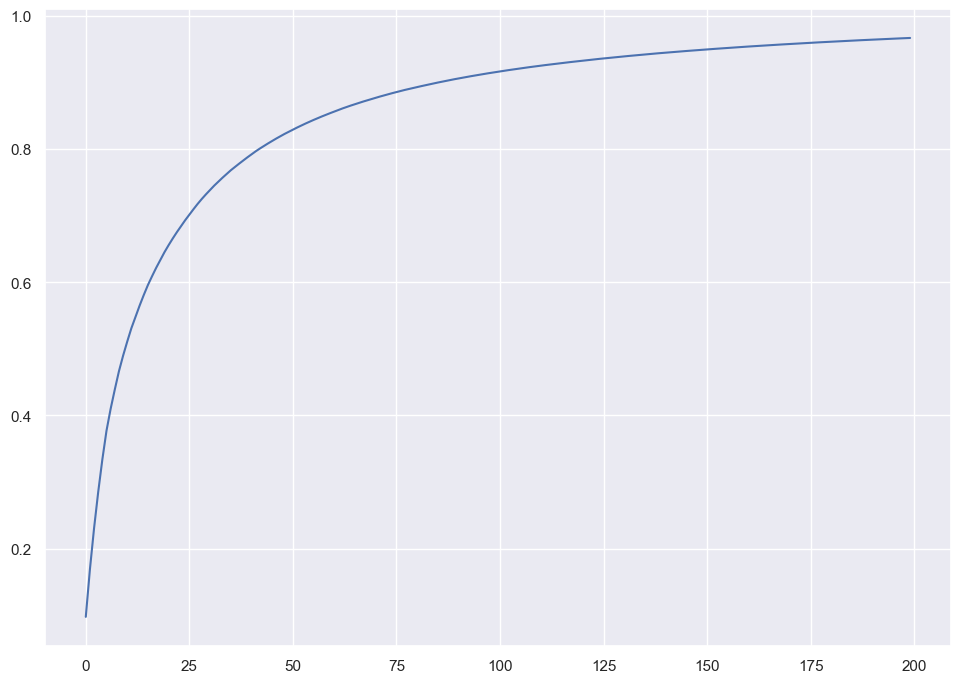

In [65]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

Подберем лучшее число соседей при меньшем количестве компонент

In [66]:
components = [20, 25, 30, 35, 40, 45, 50]

In [146]:
scores = np.zeros((components[len(components)-1]+1, neighbors[len(neighbors)-1]+1))
for c in components:
    for n in neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train[:, :c], y_train)
        scores[c][n] = knn.score(X_test[:, :c], y_test)

In [147]:
plt=reload(plt)

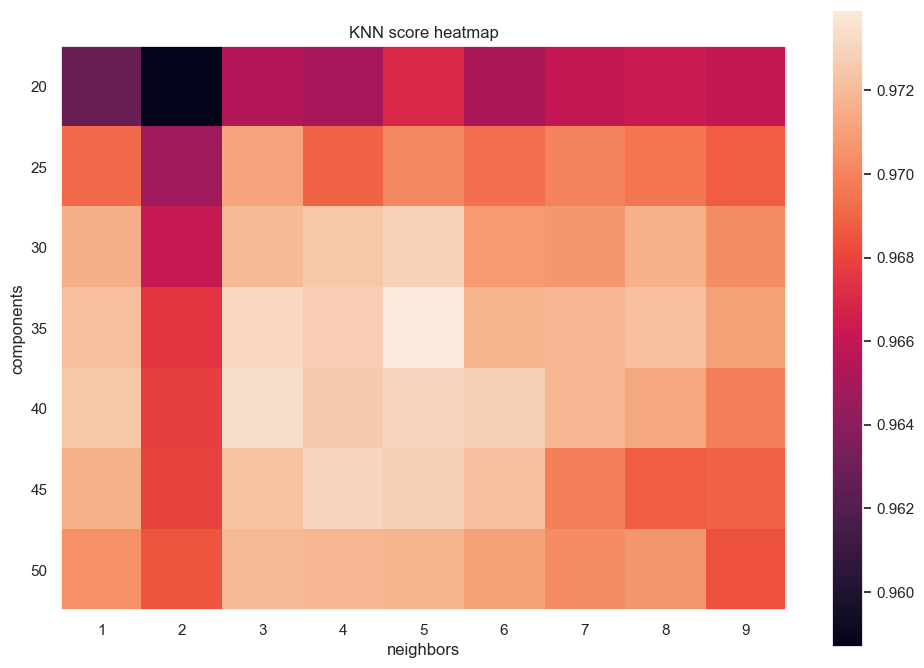

In [149]:
scores = np.reshape(scores[scores != 0], (len(components), len(neighbors)))
plt.rcParams["axes.grid"] = False
fig, ax = plt.subplots()
plt.imshow(scores)

plt.xlabel('neighbors')
plt.ylabel('components')
plt.xticks(np.arange(9), neighbors)
plt.yticks(np.arange(7), components)
plt.title('KNN score heatmap')

plt.colorbar()
plt.show()

- 35 компонент и 5 соседей

In [150]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca[:, :35], y)

KNeighborsClassifier()

In [151]:
pred = knn.predict(test_pca[:, :35])

In [152]:
Submission = pd.DataFrame({
        "ImageId": range(1, pred.shape[0]+1),
        "Label": pred
    })

Submission.to_csv("KnnSecondSubmission.csv", index=False)

Submission.head(5)

,ImageId,Label
0,1,2
1,2,0
2,3,8
3,4,2
4,5,4


Score = 0.6006

Попробуем улучшить результат, дополнив данные базой данных MNIST с 62000 строк

In [68]:
y = train['label']
X = train.drop('label', axis=1)
X.columns = np.arange(784)

In [104]:
mnist_train = pd.read_csv('mnist_train.csv')
y = pd.concat([y, mnist_train['label']])

In [70]:
mnist_train.drop('label', axis=1, inplace=True)

In [71]:
mnist_train.columns = np.arange(784)

In [72]:
X = pd.concat([X, mnist_train])

In [73]:
X.shape, y.shape

((102000, 784), (102000,))

In [74]:
X.drop_duplicates()
X.shape

(102000, 784)

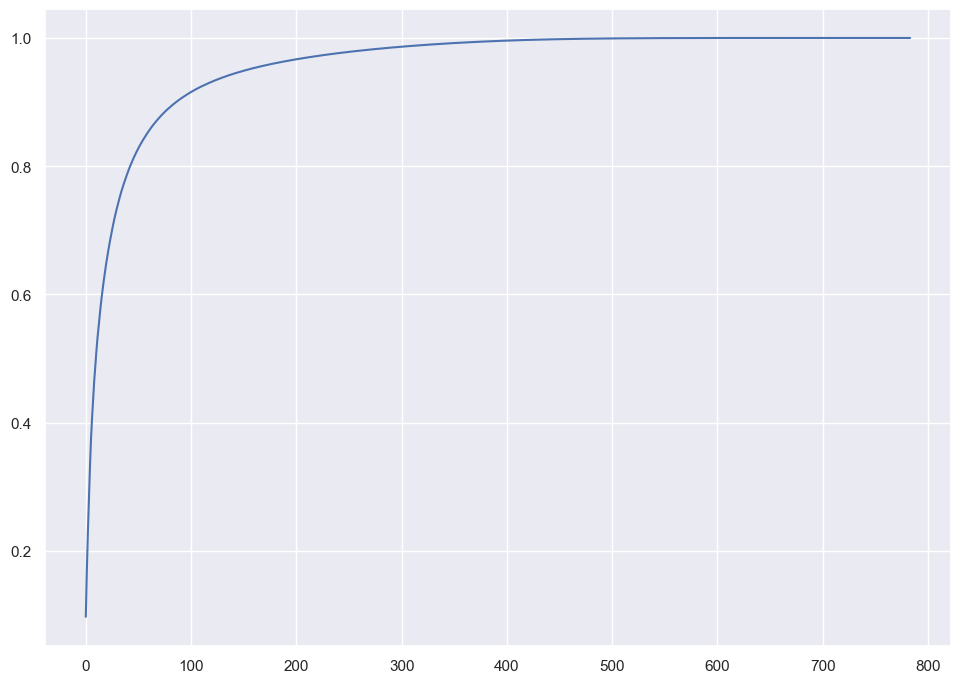

In [75]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [76]:
pca = PCA(n_components=200)
X_pca = pca.fit_transform(X);
test_pca = pca.fit_transform(test)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=17)

In [78]:
neighbors = [5, 10, 15]
components = [50, 100, 150]

In [79]:
from sklearn.neighbors import KNeighborsClassifier
scores = np.zeros((components[len(components)-1]+1, neighbors[len(neighbors)-1]+1))
for c in components:
    for n in neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train[:, :c], y_train)
        scores[c][n] = knn.score(X_test[:, :c], y_test)

In [81]:
plt=reload(plt)

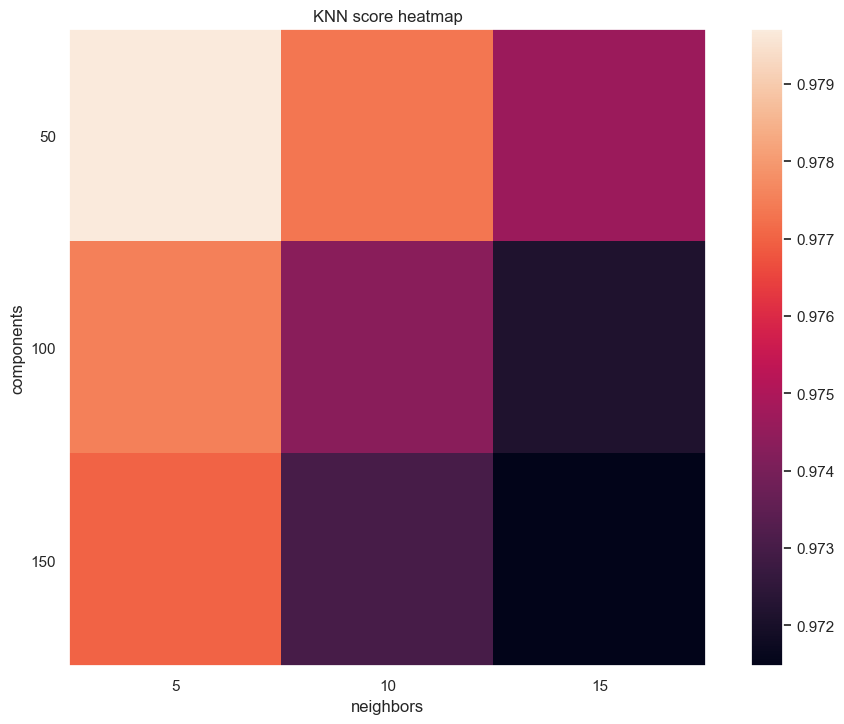

In [82]:
scores = np.reshape(scores[scores != 0], (len(components), len(neighbors)))
plt.rcParams["axes.grid"] = False
fig, ax = plt.subplots()
plt.imshow(scores)

plt.xlabel('neighbors')
plt.ylabel('components')
plt.xticks(np.arange(len(neighbors)), neighbors)
plt.yticks(np.arange(len(components)), components)
plt.title('KNN score heatmap')

plt.colorbar()
plt.show()

In [88]:
neighbors = [4, 5, 6, 8]
components = [35, 40, 45, 50, 55, 60]

In [89]:
from sklearn.neighbors import KNeighborsClassifier
scores = np.zeros((components[len(components)-1]+1, neighbors[len(neighbors)-1]+1))
for c in components:
    for n in neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train[:, :c], y_train)
        scores[c][n] = knn.score(X_test[:, :c], y_test)

In [90]:
plt=reload(plt)

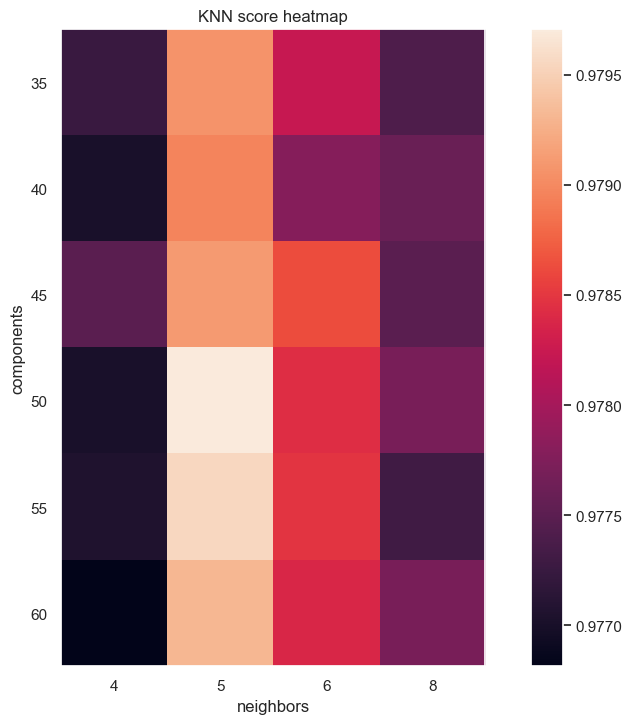

In [91]:
scores = np.reshape(scores[scores != 0], (len(components), len(neighbors)))
plt.rcParams["axes.grid"] = False
fig, ax = plt.subplots()
plt.imshow(scores)

plt.xlabel('neighbors')
plt.ylabel('components')
plt.xticks(np.arange(len(neighbors)), neighbors)
plt.yticks(np.arange(len(components)), components)
plt.title('KNN score heatmap')

plt.colorbar()
plt.show()

In [92]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca[:, :50], y)

KNeighborsClassifier()

In [93]:
pred = knn.predict(test_pca[:, :50])

In [117]:
Submission = pd.DataFrame({
        "ImageId": range(1, pred.shape[0]+1),
        "Label": pred
    })

Submission.to_csv("KnnThirdSubmission.csv", index=False)

Submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,3
3,4,2
4,5,4
5,6,2
6,7,0
7,8,9
8,9,0
9,10,4


Score = 0.58

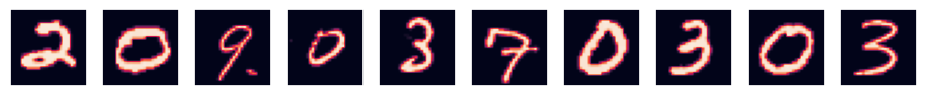

In [95]:
for i in range(10):
    ax = plt.subplot(1,10 ,i+1)
    im=ax.imshow(test.iloc[i].values.reshape(28,28))
    plt.xlabel=''
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)